<a href="https://colab.research.google.com/github/Abdelrhman410/IMDB-Analysis/blob/main/BMW_Used_Car_Listing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**$\color{skyblue}{\text{Questions of  the stake holders}}$**

1.What is the correlation between all columns?

2.Which model has the highest of prices

3.Which one has the highst price avr automatic or manual or semi-auto

4.Which type of fuel has the highest price ?

#**$\color{skyblue}{\text{Inserting The Dataset}}$**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("https://raw.githubusercontent.com/Abdelrhman410/IMDB-Analysis/main/bmw.csv")

In [59]:
df.head(10)

model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   
5   5 Series  2016  14900    Automatic    35309   Diesel  125  60.1   
6   5 Series  2017  16000    Automatic    38538   Diesel  125  60.1   
7   2 Series  2018  16250       Manual    10401   Petrol  145  52.3   
8   4 Series  2017  14250       Manual    42668   Diesel   30  62.8   
9   5 Series  2016  14250    Automatic    36099   Diesel   20  68.9   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0  
5         2.0  
6         2.0  
7         1.5  
8         2.0  
9         2.0

#**$\color{skyblue}{\text{Cleaning Data}}$**

In [62]:
df = df.dropna()

In [63]:
print(df.duplicated().sum())

117


In [64]:
df.drop_duplicates(inplace = True)

#Research Question 1 (What is the correlation between all columns ?)

In [65]:
df.corr()

year     price   mileage       tax       mpg  engineSize
year        1.000000  0.623754 -0.772761  0.025393 -0.070185   -0.022398
price       0.623754  1.000000 -0.605473  0.264178 -0.203986    0.461750
mileage    -0.772761 -0.605473  1.000000 -0.171236  0.117014   -0.006961
tax         0.025393  0.264178 -0.171236  1.000000 -0.351837    0.431361
mpg        -0.070185 -0.203986  0.117014 -0.351837  1.000000   -0.402058
engineSize -0.022398  0.461750 -0.006961  0.431361 -0.402058    1.000000

What is a good correlation? It depends on the use, but I think it is safe to say you have to have at least 0.6 (or -0.6) to call it a good correlation.


so we only have a good correlation between (year & price, mileage & price  )

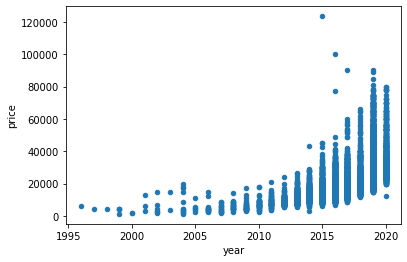

In [66]:
df.plot(kind = 'scatter', x = 'year', y = 'price')
plt.show()

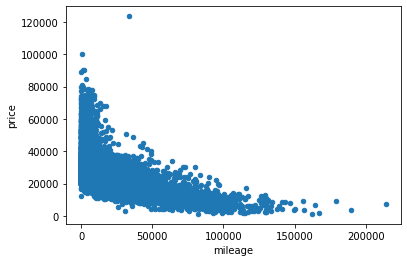

In [67]:
df.plot(kind = 'scatter', x = "mileage", y = "price" )
plt.show()

#Research Question 2 (Which model has the highest of prices ?)

In [68]:
models_names = {}

for model_name in df["model"]:
  if model_name not in models_names:
     filtered_prices = df[df['model']== model_name ]["price"].sum()
     models_names [model_name] = filtered_prices

In [69]:
inverse = [(value, key) for key, value in models_names.items()]

print(max(inverse)[1],":", max(inverse)[0])
print(min(inverse)[1],":", min(inverse)[0])

 3 Series : 48319016
 Z3 : 40785


The highst prices goes to "3 Series" and the lowest to "z3"

#Research Question 3 (Which one has the highst price avr automatic or manual or semi-auto ?)

In [83]:
for transmission in df['transmission'].unique() :
  print(transmission , ":" ,  round(df[df["transmission"] == transmission ]['price'].mean(),2))

Automatic : 22333.31
Manual : 14538.58
Semi-Auto : 27337.51


#Research Question 4 (Which type of fuel has the highest price ?)

In [84]:
for fuelType in df['fuelType'].unique():
  print(fuelType , ":" , round(df[df['fuelType'] == fuelType]['price'].mean(),2))

Diesel : 21749.45
Petrol : 24322.28
Other : 18193.86
Hybrid : 27154.97
Electric : 18466.0


In [89]:
models_prices = {}

for model in df['model'].unique():
  #print(model , ":" , round(df[df['model'] == model]['price'].mean(),2))
  models_prices [model] = round(df[df['model'] == model]['price'].mean(),2)
models_prices

{' 5 Series': 22496.28,
 ' 6 Series': 24354.37,
 ' 1 Series': 15810.91,
 ' 7 Series': 36934.32,
 ' 2 Series': 19445.35,
 ' 4 Series': 22441.98,
 ' X3': 27742.53,
 ' 3 Series': 19851.69,
 ' X5': 39559.47,
 ' X4': 32630.74,
 ' i3': 18667.12,
 ' X1': 19835.96,
 ' M4': 43277.3,
 ' X2': 28526.81,
 ' X6': 43838.61,
 ' 8 Series': 63997.79,
 ' Z4': 26919.24,
 ' X7': 69842.76,
 ' M5': 57760.0,
 ' i8': 57012.59,
 ' M2': 43140.33,
 ' M3': 30740.54,
 ' M6': 32190.0,
 ' Z3': 5826.43}

In [91]:
for key, value in models_prices.items():
  if value == max(models_prices.values()):
    print(key, ":", value)

 X7 : 69842.76
